In [24]:
import pandas as pd
df = pd.read_csv('/content/hr.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
0,0.24,0.79,2,175,5,0,0,0,IT,low,NaN
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
2,0.45,0.45,2,154,3,1,1,0,support,medium,NaN
3,0.46,0.73,6,256,4,0,0,0,product_mng,high,NaN
4,0.14,0.54,5,275,4,1,0,0,sales,high,NaN


In [25]:
df.shape


(15004, 11)

In [26]:
df.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
left,object
promotion_last_5years,int64
Department,object
salary,object


In [27]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,29


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15004 non-null  float64
 1   last_evaluation        15004 non-null  float64
 2   number_project         15004 non-null  int64  
 3   average_montly_hours   15004 non-null  int64  
 4   time_spend_company     15004 non-null  int64  
 5   Work_accident          15004 non-null  int64  
 6   left                   15004 non-null  object 
 7   promotion_last_5years  15004 non-null  int64  
 8   Department             15004 non-null  object 
 9   salary                 14975 non-null  object 
 10  age                    3080 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.3+ MB


In [29]:
(df.isnull().sum()/df.shape[0])*100

,0
satisfaction_level,0.000000
last_evaluation,0.000000
number_project,0.000000
average_montly_hours,0.000000
time_spend_company,0.000000
Work_accident,0.000000
left,0.000000
promotion_last_5years,0.000000
Department,0.000000
salary,0.193282


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

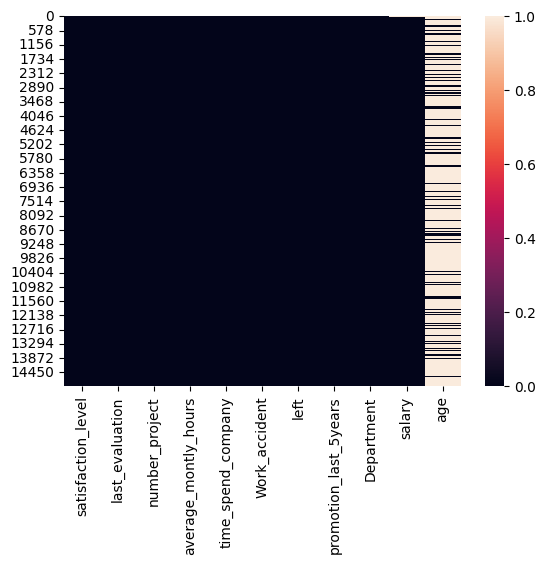

In [31]:
sns.heatmap(df.isnull())
plt.show()

In [32]:
df = df.copy()
df.dropna(subset=['age'],inplace=True)

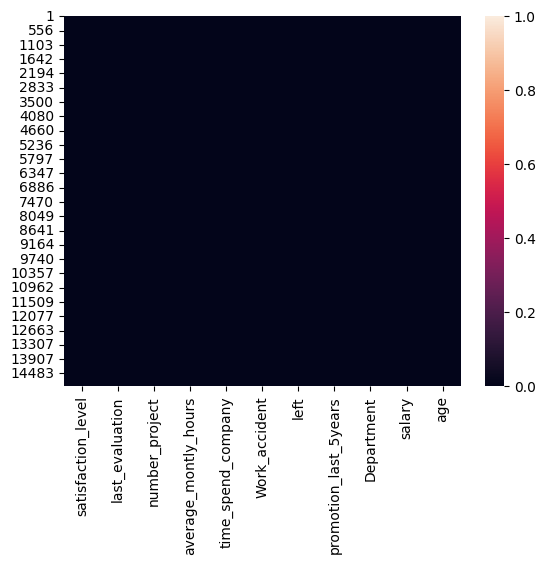

In [33]:
sns.heatmap(df.isnull())
plt.show()

In [34]:
df.shape

(3080, 11)

In [35]:

((15004-3074)/15004)*100


79.51213009864037

In [36]:

df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,6


In [37]:
df['salary'].mode()[0]

'low'

In [38]:
dataset = df.fillna(df['salary'].mode()[0],inplace = True)

In [39]:
df.isnull().sum()


,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [40]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,age
1,0.40,0.49,2,155,3,0,1,0,hr,medium,27.0
9,0.42,0.52,2,141,3,1,1,0,sales,medium,25.0
10,0.11,0.88,7,272,4,0,1,0,sales,medium,27.0


In [41]:
#EDA

<Axes: xlabel='satisfaction_level', ylabel='Count'>

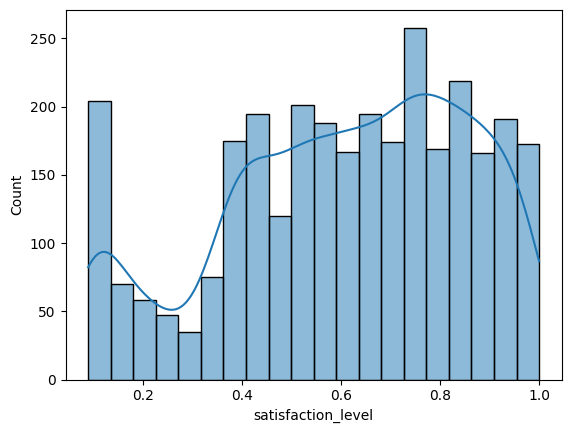

In [43]:
sns.histplot(df['satisfaction_level'], kde=True,bins=20)

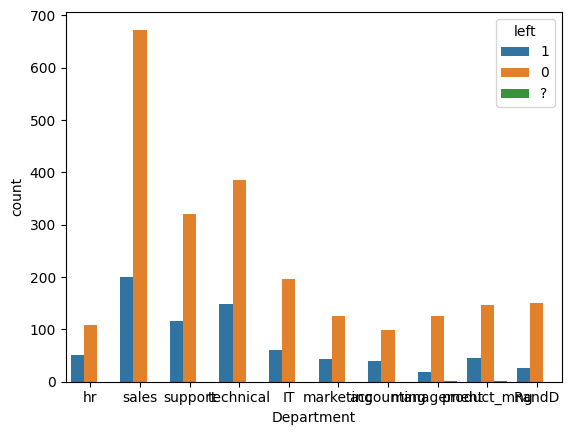

<Figure size 800x600 with 0 Axes>

In [47]:
sns.countplot(x='Department', hue='left', data=df)
plt.show()

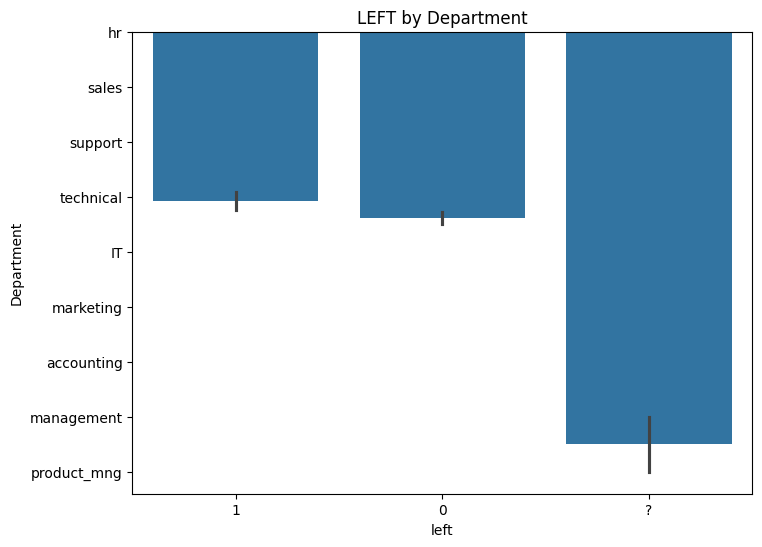

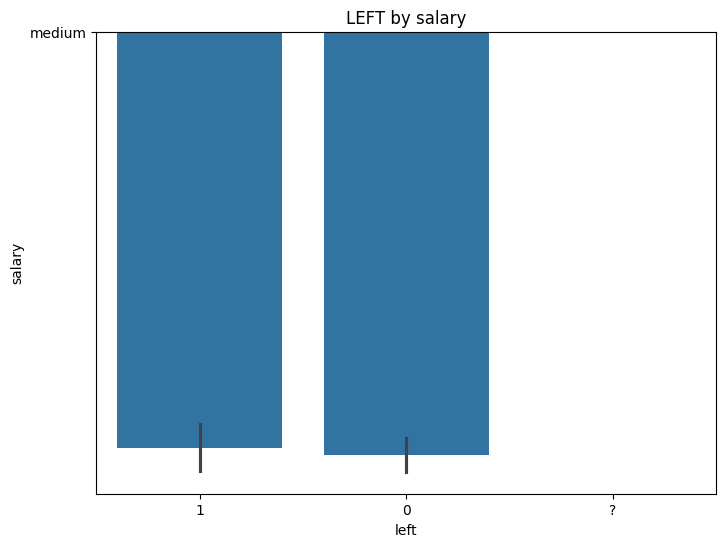

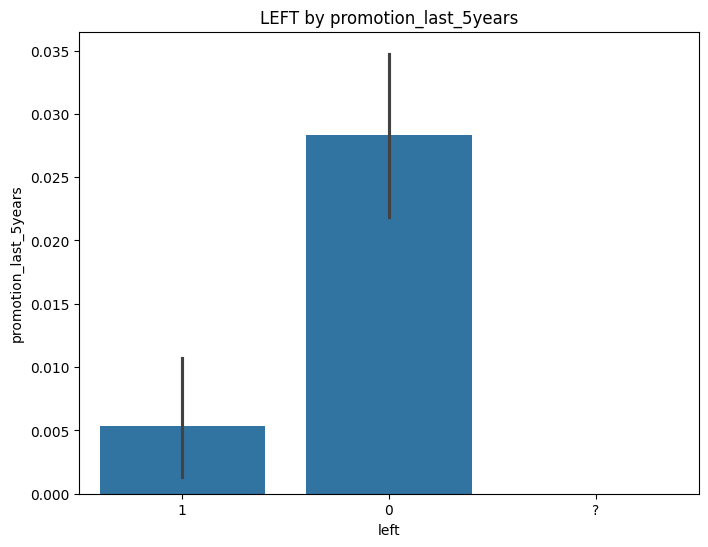

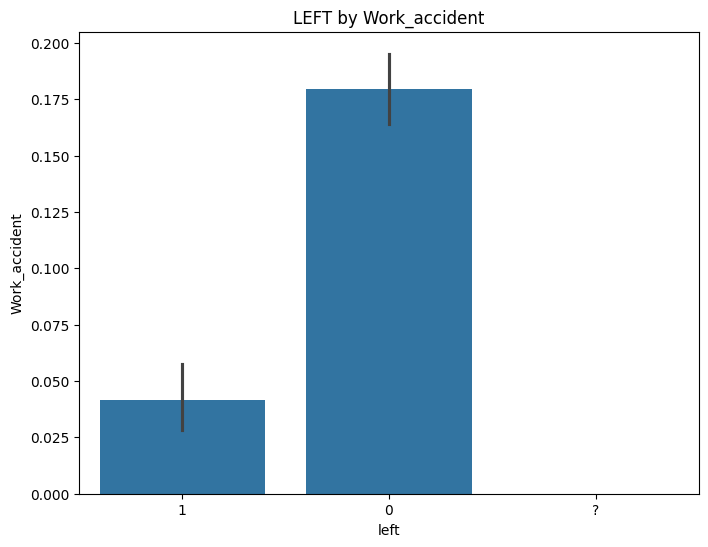

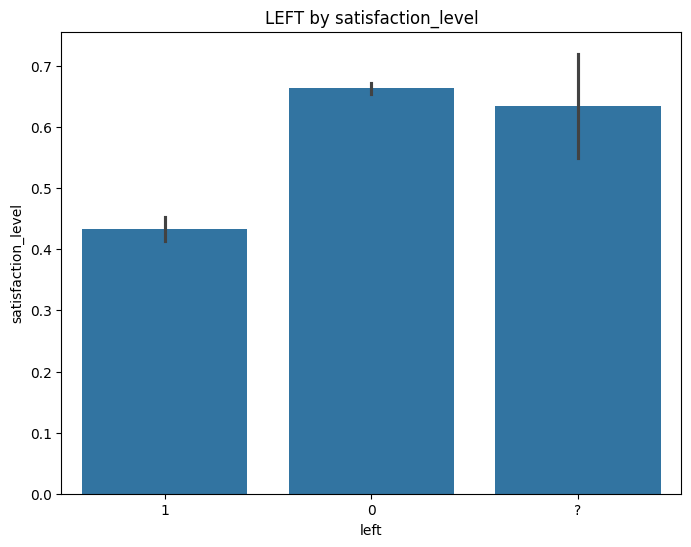

In [67]:
group = ['Department','salary','promotion_last_5years','Work_accident','satisfaction_level']
for i in  group:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='left',y=i,data=df)
    plt.title(f'LEFT by {i}')
    plt.show()

In [68]:
X = df.loc[:,['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary', 'age'
]]
y = df.left

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(), LogisticRegression())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


algorithms = [LinearRegression(), SVR()]

for algorithm in algorithms:
    model = make_pipeline(StandardScaler(), algorithm)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = model.score(X_test, y_test)*100
    accuracy


ValueError: could not convert string to float: '?'

In [74]:
df.isnull.sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0
